<a href="https://colab.research.google.com/github/zjzsu2000/257ML/blob/master/April9thDue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd# Data and Numbers
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm

# Modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import precision_score, recall_score,\
precision_recall_curve,f1_score, fbeta_score,\
accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.externals.six import StringIO
from xgboost import XGBClassifier

# Saving
import joblib
import pickle

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
%matplotlib inline
from matplotlib import rcParams

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## **Import Datasets**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv("/content/drive/My Drive/MLSpring2020/AIInsight_CrunchbasePrediction/Datasets/crunchbase/newdata.csv",encoding= 'unicode_escape')

In [0]:
#df.head()

In [0]:
df.shape

(8448, 50)

In [0]:
#df.info()

## Todo1: define the target value as success and failure

References:


> CrunchBase Reveals: The Average Successful Startup Raises $41M, Exits at $242.9M--https://techcrunch.com/2013/12/14/crunchbase-reveals-the-average-successful-startup-raises-41m-exits-at-242-9m/

> https://www.cbinsights.com/reports/CB%20Insights%20Venture%20Capital%20Exit%20Data%20Comparison.pdf


> How Long Does It Take a Startup to Exit? https://about.crunchbase.com/blog/startup-exit/






In [0]:
#Status_new 0= Closed
#Status_new 1= aqcquired/IPO
#Status_new 2= Active
df.Status_new.value_counts()

2    7459
0     964
1      25
Name: Status_new, dtype: int64

The most important thing of the project is how to define the so-called success  for a startup? 
Changing the world maybe cool,but this cannot be quantified, nor can it give a very clear definition.



> For startups, the traditional definition of success is, of course, the success of an IPO or acquisition by a large company. However, we can see from the database that only 25 of the more than 8,000 companies have successfully IPOed or were acquired. This number is actually very small. If you use such data for machine learning and training, you may not get good results. Therefore, we need to redefine what is success. So that our goal can be yes or no(1/0).



Acording to the refences above,we are tring to find more companies from the "Active" category.

>For example, it has survived long enough (not closed) and has obtained enough financing (the amount is m USD).

 We know that a company must first have enough money to pay for employees ’salaries and office rent, and then live long enough to be recognized by the capital market before it can eventually IPO or become the company that really can change the world.

In [0]:
columns_o=df.columns.to_list
columns_o

<bound method IndexOpsMixin.tolist of Index(['OrganizationName', 'AcquisitionStatus', 'BuiltWith-ActiveTechCount',
       'CBRank(Organization)', 'ClosedDate', 'CompanyType', 'Description',
       'EstimatedRevenueRange', 'FoundedDate', 'FoundedDatePrecision',
       'FullDescription', 'FundingStatus', 'HeadquartersLocation', 'IPOStatus',
       'IPqwery-PatentsGranted', 'Industries', 'IndustryGroups',
       'LastEquityFundingAmount', 'LastEquityFundingAmountCurrency',
       'LastEquityFundingAmountCurrency(inUSD)', 'LastEquityFundingType',
       'LastFundingAmount', 'LastFundingAmountCurrency',
       'LastFundingAmountCurrency(inUSD)', 'LastFundingDate',
       'NumberofAcquisitions', 'NumberofArticles', 'NumberofEmployees',
       'NumberofFounders', 'NumberofFundingRounds', 'NumberofInvestors',
       'NumberofLeadInvestors', 'OperatingStatus', 'Unnamed: 33',
       'OrganizationNameURL', 'SimilarWeb-AverageVisits(6months)',
       'SimilarWeb-MonthlyRankChange(#)', 'SimilarWeb-

Maybe we can apply some clustering algorithm to find the m here.

In [0]:
df['TotalEquityFundingAmountCurrency(inUSD)'].describe()

count    6.614000e+03
mean     2.337424e+07
std      8.676618e+07
min      1.000000e+03
25%      4.850000e+05
50%      3.000000e+06
75%      1.500000e+07
max      2.071820e+09
Name: TotalEquityFundingAmountCurrency(inUSD), dtype: float64

The mean of 'TotalEquityFundingAmountCurrency(inUSD)' is $2.33 million here.It seems better than 2013 year.Let us ignore the factor of inflation here.

In [0]:
df['TotalFundingAmountCurrency(inUSD)'].describe()

count    6.677000e+03
mean     2.451944e+07
std      9.212093e+07
min      1.000000e+03
25%      5.000000e+05
50%      3.000000e+06
75%      1.500000e+07
max      2.071820e+09
Name: TotalFundingAmountCurrency(inUSD), dtype: float64

The mean of 'TotalFundingAmount(inUSD)' is $2.45 million here.

Let's plot them

In [0]:
df["TotalFundingAmountCurrency(inUSD)"].fillna(0)

0          575000.0
1        15250000.0
2       228478585.0
3         2000000.0
4        36900000.0
           ...     
8443      9000000.0
8444            0.0
8445     30000000.0
8446            0.0
8447            0.0
Name: TotalFundingAmountCurrency(inUSD), Length: 8448, dtype: float64

In [0]:
df["TotalFundingAmountCurrency(inUSD)"].fillna(0)

0          575000.0
1        15250000.0
2       228478585.0
3         2000000.0
4        36900000.0
           ...     
8443      9000000.0
8444            0.0
8445     30000000.0
8446            0.0
8447            0.0
Name: TotalFundingAmountCurrency(inUSD), Length: 8448, dtype: float64

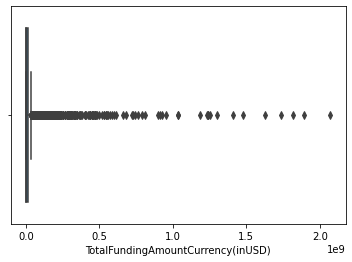

In [0]:
sns.boxplot(x="TotalFundingAmountCurrency(inUSD)", data=df)

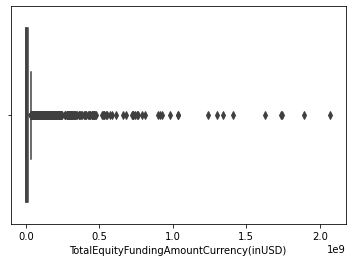

In [0]:
sns.boxplot(x="TotalEquityFundingAmountCurrency(inUSD)", data=df)

#To do2: data cleaning and preprocessing

## **Data narrative**

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   OrganizationName                         8448 non-null   object 
 1   AcquisitionStatus                        418 non-null    object 
 2   BuiltWith-ActiveTechCount                7892 non-null   float64
 3   CBRank(Organization)                     8448 non-null   object 
 4   ClosedDate                               518 non-null    object 
 5   CompanyType                              6403 non-null   object 
 6   Description                              8448 non-null   object 
 7   EstimatedRevenueRange                    4383 non-null   object 
 8   FoundedDate                              8212 non-null   object 
 9   FoundedDatePrecision                     8212 non-null   object 
 10  FullDescription                          7852 no

numbers:

In [0]:
df.describe()

,BuiltWith-ActiveTechCount,IPqwery-PatentsGranted,LastEquityFundingAmount,LastEquityFundingAmountCurrency(inUSD),LastFundingAmount,LastFundingAmountCurrency(inUSD),NumberofAcquisitions,NumberofFounders,NumberofFundingRounds,NumberofInvestors,NumberofLeadInvestors,Unnamed: 33,Status_new,TotalEquityFundingAmount,TotalEquityFundingAmountCurrency(inUSD),TotalFundingAmount,TotalFundingAmountCurrency(inUSD),TrendScore(30Days),TrendScore(7Days),TrendScore(90Days)
count,7892.000000,3123.000000,6.167000e+03,6.167000e+03,6.130000e+03,6.130000e+03,418.000000,7146.000000,8448.000000,6959.000000,3997.000000,0.0,8448.000000,6.614000e+03,6.614000e+03,6.677000e+03,6.677000e+03,8448.000000,8448.000000,8448.000000
mean,22.376964,3.045789,1.326951e+07,1.290183e+07,1.328849e+07,1.290943e+07,1.555024,2.031486,2.206795,5.098290,1.905179,NaN,1.768821,2.356841e+07,2.337424e+07,2.471917e+07,2.451944e+07,0.544022,0.130196,0.804226
std,18.653907,13.315643,4.275189e+07,4.151520e+07,4.372436e+07,4.247941e+07,1.335042,0.995576,1.708541,5.779168,1.333433,NaN,0.637184,8.711167e+07,8.676618e+07,9.246583e+07,9.212093e+07,1.676787,0.929359,2.328609
min,1.000000,0.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,-5.300000,-4.100000,-6.800000
25%,8.000000,0.000000,3.427315e+05,3.300000e+05,3.000000e+05,3.000000e+05,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,2.000000,4.999962e+05,4.850000e+05,5.000000e+05,5.000000e+05,-0.200000,-0.300000,-0.400000
50%,18.000000,0.000000,2.500000e+06,2.500000e+06,2.416000e+06,2.400000e+06,1.000000,2.000000,2.000000,3.000000,1.000000,NaN,2.000000,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,-0.100000,-0.100000,-0.100000
75%,32.000000,1.000000,1.038000e+07,1.010000e+07,1.000000e+07,1.000000e+07,2.000000,3.000000,3.000000,7.000000,2.000000,NaN,2.000000,1.500000e+07,1.500000e+07,1.500000e+07,1.500000e+07,0.800000,0.300000,1.200000
max,195.000000,287.000000,1.100000e+09,1.100000e+09,1.100000e+09,1.100000e+09,14.000000,11.000000,20.000000,104.000000,12.000000,NaN,2.000000,2.071820e+09,2.071820e+09,2.071820e+09,2.071820e+09,10.000000,9.700000,10.000000


categorical columns:

In [0]:
def get_cat_columns(data):
  cat_columns_map={}
  cat_columns=[]
  for column in data.select_dtypes(include=[object]):
    cat_columns.append(column)
  for name in   cat_columns:
    cat_columns_map[name]=data[name].unique().tolist()
  return cat_columns_map

In [0]:
cat_columns_map0=get_cat_columns(df)

In [0]:
def get_report_cluster(cat_columns_map):
  cat_columns_catNumber={}
  for name in cat_columns_map:
     cat_columns_catNumber[name]=len(df[name].unique().tolist())
  cat_columns_catNumber
  report_cluster={}
  for i in range(0,np.asarray(list(cat_columns_catNumber.values())).max()+1):
      if [j for j,k in cat_columns_catNumber.items() if k == i]:
        report_cluster[i]=[l for l,m in cat_columns_catNumber.items() if m == i]
  return report_cluster

In [0]:
report_cluster0=get_report_cluster(cat_columns_map0)
report_cluster0

{1: ['IPOStatus'],
 2: ['AcquisitionStatus', 'OperatingStatus'],
 3: ['CompanyType', 'FundingStatus'],
 4: ['FoundedDatePrecision'],
 9: ['EstimatedRevenueRange'],
 10: ['NumberofEmployees'],
 12: ['LastEquityFundingType'],
 17: ['TotalFundingAmountCurrency'],
 18: ['TotalEquityFundingAmountCurrency'],
 19: ['LastFundingAmountCurrency'],
 20: ['LastEquityFundingAmountCurrency'],
 98: ['HeadquartersLocation'],
 285: ['NumberofArticles'],
 300: ['ClosedDate'],
 1429: ['FoundedDate'],
 2851: ['LastFundingDate'],
 3182: ['IndustryGroups'],
 3931: ['SimilarWeb-MonthlyVisits'],
 4055: ['SimilarWeb-MonthlyRankGrowth'],
 4875: ['SimilarWeb-MonthlyRankChange(#)'],
 5756: ['Top5Investors'],
 6288: ['SimilarWeb-AverageVisits(6months)'],
 7070: ['Industries'],
 7763: ['FullDescription'],
 8312: ['OrganizationName'],
 8349: ['Description'],
 8355: ['CBRank(Organization)', 'OrganizationNameURL']}

We can see that some of the features have too many categories here.And many of them not make sense.We will deal with them with features engneering in data preprocessing.

In [0]:
#print("Unique values in each categorical column:")
#cat_columns_map

In [0]:
cat_columns0=cat_columns_map0.keys()
len(cat_columns0)

30

##Data preprocessing

###Data cleaning

In [0]:
df.shape

(8448, 50)

There are 51 features here,it is too many to apply any ML algorithm and input X for predict.So we must reduce dimension here.

Removing the unimportant features will help with memory, computational cost and the accuracy of our model.Also, it will help to avoid the overfitting. Sometimes, a feature that makes business sense, but it doesn’t mean that this feature will help us with our prediction.

In [0]:
df.columns

Index(['OrganizationName', 'AcquisitionStatus', 'BuiltWith-ActiveTechCount',
       'CBRank(Organization)', 'ClosedDate', 'CompanyType', 'Description',
       'EstimatedRevenueRange', 'FoundedDate', 'FoundedDatePrecision',
       'FullDescription', 'FundingStatus', 'HeadquartersLocation', 'IPOStatus',
       'IPqwery-PatentsGranted', 'Industries', 'IndustryGroups',
       'LastEquityFundingAmount', 'LastEquityFundingAmountCurrency',
       'LastEquityFundingAmountCurrency(inUSD)', 'LastEquityFundingType',
       'LastFundingAmount', 'LastFundingAmountCurrency',
       'LastFundingAmountCurrency(inUSD)', 'LastFundingDate',
       'NumberofAcquisitions', 'NumberofArticles', 'NumberofEmployees',
       'NumberofFounders', 'NumberofFundingRounds', 'NumberofInvestors',
       'NumberofLeadInvestors', 'OperatingStatus', 'Unnamed: 33',
       'OrganizationNameURL', 'SimilarWeb-AverageVisits(6months)',
       'SimilarWeb-MonthlyRankChange(#)', 'SimilarWeb-MonthlyRankGrowth',
       'SimilarWeb

Some features (such as 'CBRank(Organization)','Description','FullDescription','OrganizationNameURL','SimilarWeb-AverageVisits(6months)','SimilarWeb-MonthlyRankChange(#)', 'SimilarWeb-MonthlyRankGrowth',
       'SimilarWeb-MonthlyVisits', 'TrendScore(30Days)', 'TrendScore(7Days)', 'TrendScore(90Days)') are duplicate and some of them (such as permalink,company_name) will not help us with our prediction.We drop them first.

In [0]:
useless_cols=['CBRank(Organization)','Description','FullDescription','OrganizationNameURL','SimilarWeb-AverageVisits(6months)','SimilarWeb-MonthlyRankChange(#)',
             'SimilarWeb-MonthlyRankGrowth', 'SimilarWeb-MonthlyVisits', 'TrendScore(30Days)', 'TrendScore(7Days)', 'TrendScore(90Days)']

In [0]:
df_clean=df.copy()

In [0]:
for col in useless_cols:
   df_clean.drop([col],axis=1,inplace=True)

In [0]:
df_clean.shape

(8448, 39)

Some of other features(such as  'AcquisitionStatus', 'ClosedDate', 'IPOStatus','LastEquityFundingAmount', 'LastEquityFundingAmountCurrency', 'LastEquityFundingAmountCurrency(inUSD)', 'LastFundingAmount', LastFundingAmountCurrency','LastFundingAmountCurrency(inUSD)', 'OperatingStatus', 'Status_new', 'TotalEquityFundingAmount', 'TotalEquityFundingAmountCurrency','TotalEquityFundingAmountCurrency(inUSD)', 'TotalFundingAmount', 'TotalFundingAmountCurrency', 'TotalFundingAmountCurrency(inUSD)'）.All of them related to the features 'status'and 'TotalFundingAmountCurrency(inUSD)'  ,which have been used by us to define the so-called success, if you keep them, it is equivalent to a repetition.So we drop them.

In [0]:
status_relate_cols=['AcquisitionStatus', 'ClosedDate', 'IPOStatus','LastEquityFundingAmount', 'LastEquityFundingAmountCurrency', 'LastEquityFundingAmountCurrency(inUSD)', 
 'LastFundingAmount', 'LastFundingAmountCurrency','LastFundingAmountCurrency(inUSD)', 'OperatingStatus', 'Status_new', 'TotalEquityFundingAmount', 
'TotalEquityFundingAmountCurrency','TotalEquityFundingAmountCurrency(inUSD)', 'TotalFundingAmount', 'TotalFundingAmountCurrency', 'TotalFundingAmountCurrency(inUSD)']

In [0]:
for col in status_relate_cols:
    df_clean.drop([col],axis=1,inplace=True)

In [0]:
df_clean.shape

(8448, 22)

In [0]:
df_clean.head(2)

,OrganizationName,BuiltWith-ActiveTechCount,CompanyType,EstimatedRevenueRange,FoundedDate,FoundedDatePrecision,FundingStatus,HeadquartersLocation,IPqwery-PatentsGranted,Industries,IndustryGroups,LastEquityFundingType,LastFundingDate,NumberofAcquisitions,NumberofArticles,NumberofEmployees,NumberofFounders,NumberofFundingRounds,NumberofInvestors,NumberofLeadInvestors,Unnamed: 33,Top5Investors
0,C. Light Technologies,11.0,For Profit,NaN,9/1/14,month,Seed,"Berkeley, California, United States",NaN,"Health Care, Software","Health Care, Software",Pre-Seed,1/1/17,NaN,2,10-Jan,2.0,1,2.0,NaN,NaN,"National Institutes of Health, C. Light Ventures"
1,C1X,23.0,For Profit,Less than $1M,1/1/14,year,Early Stage Venture,"San Jose, California, United States",NaN,"Advertising, E-Commerce, Internet","Advertising, Commerce and Shopping, Internet S...",Series B,10/12/16,NaN,12,51-100,2.0,2,5.0,2.0,NaN,"UTEC- University of Tokyo Edge Capital, Mynavi..."


In [0]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrganizationName           8448 non-null   object 
 1   BuiltWith-ActiveTechCount  7892 non-null   float64
 2   CompanyType                6403 non-null   object 
 3   EstimatedRevenueRange      4383 non-null   object 
 4   FoundedDate                8212 non-null   object 
 5   FoundedDatePrecision       8212 non-null   object 
 6   FundingStatus              8448 non-null   object 
 7   HeadquartersLocation       8448 non-null   object 
 8   IPqwery-PatentsGranted     3123 non-null   float64
 9   Industries                 8366 non-null   object 
 10  IndustryGroups             8346 non-null   object 
 11  LastEquityFundingType      8448 non-null   object 
 12  LastFundingDate            8448 non-null   object 
 13  NumberofAcquisitions       418 non-null    float

Let's find the data of the features which are null？

In [0]:
def cal_missing_data(data):
  missing_data = data.isnull().sum().sort_values(ascending = False)
  missing_data_rate = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
  print(missing_data_rate)

In [0]:
cal_missing_data(df_clean)

Unnamed: 33                  1.000000
NumberofAcquisitions         0.950521
IPqwery-PatentsGranted       0.630327
NumberofLeadInvestors        0.526870
EstimatedRevenueRange        0.481179
NumberofArticles             0.409683
CompanyType                  0.242069
Top5Investors                0.176255
NumberofInvestors            0.176255
NumberofFounders             0.154119
NumberofEmployees            0.138968
BuiltWith-ActiveTechCount    0.065814
FoundedDatePrecision         0.027936
FoundedDate                  0.027936
IndustryGroups               0.012074
Industries                   0.009706
FundingStatus                0.000000
HeadquartersLocation         0.000000
LastEquityFundingType        0.000000
LastFundingDate              0.000000
NumberofFundingRounds        0.000000
OrganizationName             0.000000
dtype: float64


Some features are too many missing data(such as "avg_time_bw_rounds"), it does n’t make much sense to keep or fill, so they also should be deleted.

In [0]:
df_clean.drop(['Unnamed: 33'],axis=1,inplace=True)
df_clean.drop(['NumberofAcquisitions'],axis=1,inplace=True)

Some features are not too many missing(such as "FoundedDatePrecision","FoundedDate"),we can just remove the missing data.And we will deal with the two columns to become one later.

In [0]:
df_clean.dropna(subset=['FoundedDatePrecision'],axis=0, inplace = True)
df_clean.dropna(subset=['FoundedDate'],axis=0,inplace=True)

In [0]:
df_clean.isnull().sum().sort_values(ascending = False)

IPqwery-PatentsGranted       5125
NumberofLeadInvestors        4268
EstimatedRevenueRange        3882
NumberofArticles             3248
CompanyType                  1946
Top5Investors                1453
NumberofInvestors            1453
NumberofFounders             1169
NumberofEmployees            1028
BuiltWith-ActiveTechCount     474
IndustryGroups                 90
Industries                     71
HeadquartersLocation            0
FundingStatus                   0
FoundedDatePrecision            0
FoundedDate                     0
LastEquityFundingType           0
LastFundingDate                 0
NumberofFundingRounds           0
OrganizationName                0
dtype: int64

We should fill them.Let's analysis them.

In [0]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8212 entries, 0 to 8447
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrganizationName           8212 non-null   object 
 1   BuiltWith-ActiveTechCount  7738 non-null   float64
 2   CompanyType                6266 non-null   object 
 3   EstimatedRevenueRange      4330 non-null   object 
 4   FoundedDate                8212 non-null   object 
 5   FoundedDatePrecision       8212 non-null   object 
 6   FundingStatus              8212 non-null   object 
 7   HeadquartersLocation       8212 non-null   object 
 8   IPqwery-PatentsGranted     3087 non-null   float64
 9   Industries                 8141 non-null   object 
 10  IndustryGroups             8122 non-null   object 
 11  LastEquityFundingType      8212 non-null   object 
 12  LastFundingDate            8212 non-null   object 
 13  NumberofArticles           4964 non-null   objec

Fill some of them with 0(IPqwery-PatentsGranted and BuiltWith-ActiveTechCount,which only some companies have these)

In [0]:
df_clean['BuiltWith-ActiveTechCount']=df_clean['BuiltWith-ActiveTechCount'].fillna(0)
df_clean['IPqwery-PatentsGranted']=df_clean['IPqwery-PatentsGranted'].fillna(0)
df_clean['NumberofInvestors']=df_clean['NumberofInvestors'].fillna(0)    
df_clean['NumberofLeadInvestors']=df_clean['NumberofLeadInvestors'].fillna(0)   

Fill some of them with mean.

In [0]:
df_clean['NumberofFounders']=df_clean['NumberofFounders'].fillna(df_clean['NumberofFounders'].mean())

In [0]:
df_clean.isnull().sum().sort_values(ascending = False)

EstimatedRevenueRange        3882
NumberofArticles             3248
CompanyType                  1946
Top5Investors                1453
NumberofEmployees            1028
IndustryGroups                 90
Industries                     71
LastFundingDate                 0
LastEquityFundingType           0
NumberofFounders                0
NumberofLeadInvestors           0
IPqwery-PatentsGranted          0
HeadquartersLocation            0
FundingStatus                   0
FoundedDatePrecision            0
FoundedDate                     0
NumberofFundingRounds           0
NumberofInvestors               0
BuiltWith-ActiveTechCount       0
OrganizationName                0
dtype: int64

In [0]:
cat_columns_map1=get_cat_columns(df_clean)
report_cluster1=get_report_cluster(cat_columns_map1)
report_cluster1

{3: ['CompanyType', 'FundingStatus'],
 4: ['FoundedDatePrecision'],
 9: ['EstimatedRevenueRange'],
 10: ['NumberofEmployees'],
 12: ['LastEquityFundingType'],
 98: ['HeadquartersLocation'],
 285: ['NumberofArticles'],
 1429: ['FoundedDate'],
 2851: ['LastFundingDate'],
 3182: ['IndustryGroups'],
 5756: ['Top5Investors'],
 7070: ['Industries'],
 8312: ['OrganizationName']}

In [0]:
pd.set_option('display.max_columns', None)
def style_specific_cell(x):
    color_thresh = 'background-color: lightgreen'   
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)
    rows_number=len(x.index)
    column_number=len(x.columns)
    for r in range(0,rows_number): 
        for c in range(0,column_number):
            try:
                val=float(x.iloc[r, c])
                if x.iloc[r, 0]=="%":
                    if val<10:
                        df_color.iloc[r, c]=color_thresh
            except:
                pass            
    return df_color

In [0]:
def make_percent_report(report_cluster,key,df):
    percentage_report=[]
    for name in sorted(report_cluster[key]):
        data=pd.crosstab(df[name],columns=["%"]).apply(lambda r: (round((r/r.sum())*100,2)), axis=0).reset_index()
        data.columns=[name,"%"]
        data=data.transpose().reset_index()
        [percentage_report.append(x) for x in data.values.tolist()]
        options=[]
    percentage_report=pd.DataFrame(percentage_report)
    [options.append("Category"+str(itr)) for itr in range(1,len(percentage_report.columns))]
    percentage_report.columns=["Features"]+options
    display(percentage_report.style.apply(style_specific_cell, axis=None))

In [0]:
for key in report_cluster1.keys():
  if key<12:
    make_percent_report(report_cluster1,key,df)

,Features,Category1,Category2,Category3
0,CompanyType,For Profit,Non-profit,None
1,%,99.610000,0.390000,None
2,FundingStatus,Early Stage Venture,Late Stage Venture,Seed
3,%,27.890000,9.690000,62.420000


,Features,Category1,Category2,Category3
0,FoundedDatePrecision,day,month,year
1,%,33.580000,9.270000,57.150000


,Features,Category1,Category2,Category3,Category4,Category5,Category6,Category7,Category8
0,EstimatedRevenueRange,$100M to $500M,$10B+,$10M to $50M,$1B to $10B,$1M to $10M,$500M to $1B,$50M to $100M,Less than $1M
1,%,1.230000,0.050000,9.030000,0.160000,56.130000,0.090000,1.160000,32.150000


,Features,Category1,Category2,Category3,Category4,Category5,Category6,Category7,Category8,Category9
0,NumberofEmployees,10-Jan,10001+,1001-5000,101-250,251-500,5001-10000,501-1000,51-100,Nov-50
1,%,45.770000,0.080000,0.380000,5.440000,1.510000,0.050000,0.870000,7.050000,38.840000


Some of other features don't seem to be the things that explicitly impacts success,we drop them.

In [0]:
df_clean.drop(['NumberofArticles'],axis=1,inplace=True)

There is only 0.39% of "Non-profit" in "CompanyType" feature here. The ratio is so low, this feature will become outliers which will affect our algorithm implementation, and it don't make sense , we can remove this feature first.

In [0]:
df_clean.drop(['CompanyType'],axis=1,inplace=True)

###Merge the categarical features

####NumberofEmployees

In [0]:
df_clean['NumberofEmployees'].value_counts()

10-Jan        3258
Nov-50        2810
51-100         513
101-250        394
251-500        110
501-1000        62
1001-5000       28
10001+           5
5001-10000       4
Name: NumberofEmployees, dtype: int64

We can merge the >100 categaries.

In [0]:
NumberofEmployees={'10-Jan':"<10", 'Nov-50':"11~50", '51-100':"51~100",
                   '101-250':">100",'251-500':">100",'501-1000':">100",
                   '1001-5000':">100",'10001+':">100",'5001-10000':">100"}
df_clean['NumberofEmployees']=df_clean['NumberofEmployees'].map(NumberofEmployees)

In [0]:
df_clean['NumberofEmployees'].value_counts()

<10       3258
11~50     2810
>100       603
51~100     513
Name: NumberofEmployees, dtype: int64

####EstimatedRevenueRange


In [0]:
df_clean['EstimatedRevenueRange'].value_counts()

$1M to $10M       2432
Less than $1M     1385
$10M to $50M       395
$100M to $500M      54
$50M to $100M       51
$1B to $10B          7
$500M to $1B         4
$10B+                2
Name: EstimatedRevenueRange, dtype: int64

You know, if the company EstimatedRevenueRange is more than 10M usd,I think it is not a start-up now.So 10M+ usd should be a type here.

In [0]:
EstimatedRevenueRange={'$1M to $10M':"$1M to $10M",'Less than $1M':"Less than $1M",
                       '$10M to $50M':"$10M+", '$100M to $500M':"$10M+",'$50M to $100M':"$10M+",
                       '$1B to $10B':"$10M+",'$500M to $1B':"$10M+",'$10B+':"$10M+"}
df_clean['EstimatedRevenueRange']=df_clean['EstimatedRevenueRange'].map(EstimatedRevenueRange)

In [0]:
df_clean['EstimatedRevenueRange'].value_counts()

$1M to $10M      2432
Less than $1M    1385
$10M+             513
Name: EstimatedRevenueRange, dtype: int64

####Top5Investors (1453 missing)

In [0]:
df_clean['Top5Investors'].value_counts()

Y Combinator                                                                                 295
500 Startups                                                                                 107
Plug and Play                                                                                 63
Start-Up Chile                                                                                30
Alchemist Accelerator                                                                         25
                                                                                            ... 
Joyance Partners                                                                               1
Susa Ventures, Universal Music Group, GV, Detroit Venture Partners, David Spector              1
LabCorp, Artis Ventures (AV), Originate, Acadia Woods Partners                                 1
First Round Capital, Stewart Butterfield, Reid Hoffman, Caterina Fake, Joi Ito                 1
Runa Capital, Bessemer Venture

['Y Combinator',                       'Startups',
'Plug and Play',
'Start-Up Chile','Alchemist Accelerator']are the most famous Investor, but some of others are not.We can make a list of famous investors.

In [0]:
famous_investor=['Y Combinator',  'Startups', 'Plug and Play',
                 'Start-Up Chile','Alchemist Accelerator']

##Latent Manifold

###Now,we can get the Latent Manifold here, if the company was invested by famous investors.It seems that companies invested by well-known investment institutions may be more likely to succeed because they have an invisible endorsement

In [0]:
df_clean['Top5Investors']=df_clean['Top5Investors'].fillna('none')

In [0]:
list_inv=df_clean['Top5Investors'].values.tolist()

In [0]:
len(list_inv)

8212

In [0]:
df_clean.shape

(8212, 18)

In [0]:
df_clean['inv_by_famous_investor']=None

In [0]:
df_clean['inv_by_famous_investor']=df_clean['inv_by_famous_investor'].fillna(0)

In [0]:
famous_investor

['Y Combinator',
 'Startups',
 'Plug and Play',
 'Start-Up Chile',
 'Alchemist Accelerator']

In [0]:
for inv_name in famous_investor:
  print(inv_name)
  for i in range(df_clean.shape[1]):     
    if df_clean['Top5Investors'][i]==inv_name:
      df_clean['inv_by_famous_investor'][i]=1
    if  inv_name in df_clean['Top5Investors'][i]:
      df_clean['inv_by_famous_investor'][i]=1

Y Combinator
Startups
Plug and Play
Start-Up Chile
Alchemist Accelerator


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
df_clean['inv_by_famous_investor']=df_clean['inv_by_famous_investor'].fillna(0)

In [0]:
df_clean['inv_by_famous_investor'].value_counts()

0    8209
1       3
Name: inv_by_famous_investor, dtype: int64

In [0]:
df_clean.head()

,OrganizationName,BuiltWith-ActiveTechCount,EstimatedRevenueRange,FoundedDate,FoundedDatePrecision,FundingStatus,HeadquartersLocation,IPqwery-PatentsGranted,Industries,IndustryGroups,LastEquityFundingType,LastFundingDate,NumberofEmployees,NumberofFounders,NumberofFundingRounds,NumberofInvestors,NumberofLeadInvestors,Top5Investors,inv_by_famous_investor
0,C. Light Technologies,11.0,NaN,9/1/14,month,Seed,"Berkeley, California, United States",0.0,"Health Care, Software","Health Care, Software",Pre-Seed,1/1/17,<10,2.0,1,2.0,0.0,"National Institutes of Health, C. Light Ventures",0
1,C1X,23.0,Less than $1M,1/1/14,year,Early Stage Venture,"San Jose, California, United States",0.0,"Advertising, E-Commerce, Internet","Advertising, Commerce and Shopping, Internet S...",Series B,10/12/16,51~100,2.0,2,5.0,2.0,"UTEC- University of Tokyo Edge Capital, Mynavi...",0
2,C3,13.0,$10M+,1/1/09,year,Late Stage Venture,"Redwood City, California, United States",0.0,"Artificial Intelligence, Big Data, Cloud Compu...","Apps, Artificial Intelligence, Data and Analyt...",Series F,3/28/18,>100,2.0,6,8.0,2.0,"TPG Growth, Sutter Hill Ventures, The Rise Fun...",0
3,C3DNA,14.0,NaN,4/17/13,day,Seed,"Cupertino, California, United States",5.0,"Cloud Computing, Software","Internet Services, Software",Seed,10/1/14,11~50,2.0,1,0.0,0.0,none,0
4,C3Nano,31.0,$1M to $10M,1/1/10,year,Late Stage Venture,"Hayward, California, United States",0.0,"Clean Energy, Electronics, Manufacturing, Solar","Consumer Electronics, Energy, Hardware, Manufa...",Series D,2/22/17,11~50,1.0,4,6.0,3.0,"GSR Ventures, Phoenix Venture Partners LLC, Ni...",0


In [0]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8212 entries, 0 to 8447
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OrganizationName           8212 non-null   object 
 1   BuiltWith-ActiveTechCount  8212 non-null   float64
 2   EstimatedRevenueRange      4330 non-null   object 
 3   FoundedDate                8212 non-null   object 
 4   FoundedDatePrecision       8212 non-null   object 
 5   FundingStatus              8212 non-null   object 
 6   HeadquartersLocation       8212 non-null   object 
 7   IPqwery-PatentsGranted     8212 non-null   float64
 8   Industries                 8141 non-null   object 
 9   IndustryGroups             8122 non-null   object 
 10  LastEquityFundingType      8212 non-null   object 
 11  LastFundingDate            8212 non-null   object 
 12  NumberofEmployees          7184 non-null   object 
 13  NumberofFounders           8212 non-null   float

In [0]:
cat_columns_map2=get_cat_columns(df_clean)
report_cluster2=get_report_cluster(cat_columns_map2)
report_cluster2

{3: ['FundingStatus'],
 4: ['FoundedDatePrecision'],
 9: ['EstimatedRevenueRange'],
 10: ['NumberofEmployees'],
 12: ['LastEquityFundingType'],
 98: ['HeadquartersLocation'],
 1429: ['FoundedDate'],
 2851: ['LastFundingDate'],
 3182: ['IndustryGroups'],
 5756: ['Top5Investors'],
 7070: ['Industries'],
 8312: ['OrganizationName']}

In [0]:
df_clean[]

SyntaxError: ignored

##Get the Business type of companies by the Industries

> The time it takes for a startup to exit depends on the industry.



In [0]:
#df.columns

In [0]:
df = pd.DataFrame(df)

In [0]:
df_new = df[['Industries']]

In [0]:
df_new['Industries'] = df_new['Industries'].astype(str)

In [0]:
for i in range(len(df['Industries'])):
    af = df_new['Industries'].iloc[i]
    bf = af.split(',',1)[0]
    cf = bf.lower() 
    df_new['Industries'].iloc[i] = cf

In [0]:
#df_new

In [0]:
df['Buessiness'] = df_new['Industries']

In [0]:
df.Buessiness.value_counts()

In [0]:
df.columns

In [0]:
df.FoundedDate = pd.to_datetime(df.loc[:, 'FoundedDate'])

In [0]:
#df.info()

In [0]:
df.sort_values(by=['OrganizationName', 'FoundedDate'],
                            ascending=True,
                            inplace=True)

In [0]:
df['time_between_next_round'] = df.groupby(
    'OrganizationName').FoundedDate.diff()

In [0]:
#df['time_between_next_round']

# Todo3: get the features X of the model

Choose the X columns as the features

In [0]:
#merge business into the X features
bus_dummies = pd.get_dummies(df['Buessiness'], drop_first=True)


In [0]:
X_col_nodummies = [
    'BuiltWith-ActiveTechCount', 'IPqwery-PatentsGranted', 'NumberofInvestors',
    'NumberofFundingRounds'#,'TotalFundingAmountCurrency'
]
#cannot import LastEquityFundingAmountCurrency(inUSD), features with (inUSD)
X_nodummies = df[X_col_nodummies]

In [0]:
X = X_nodummies.merge(bus_dummies, left_index=True, right_index=True)

And clean the columns change all NAN to 0

In [0]:
df['NumberofInvestors'] = df['NumberofInvestors'].replace(np.nan, 0)
df['BuiltWith-ActiveTechCount'] = df['BuiltWith-ActiveTechCount'].replace(np.nan, 0)
df['IPqwery-PatentsGranted'] = df['IPqwery-PatentsGranted'].replace(np.nan, 0)
df['NumberofFundingRounds'] = df['NumberofFundingRounds'].replace(np.nan, 0)

In [0]:
#df.info()

# **X and Y values**

In [0]:
X_nodummies = df[X_col_nodummies]
X = X_nodummies
X['intercept'] = 1

In [0]:
#X['intercept']

In [0]:
y = df.Status_new

Target values 

In [0]:

# Count target values
target_count = y.value_counts()

# # print class balance
print(f'Class 0: {target_count[0]}')
print(f'Class 1: {target_count[1]}')
print(f'Proportion: {round(target_count[0] / target_count[1], 2)} : 1')
print('Percentage of Majority Class: {:f}'.format(
    round(target_count[0] / sum(target_count), 4) * 100))

In [0]:
target_count

# **TODO3: Modeling Part**



# **GMM**

# **Data Split**

In [0]:
# Split the data with 80% to train and 20% to test
# Stratify to ensure train and test sets have 
# similar proportions of either target class
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=40,
                                                    stratify=y)

In [0]:
# Standardize the data

scaler = StandardScaler()

# Fit the scaler using the training data and scale it
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.values),
                              columns=X.columns)

# Scale the test data
X_test_scaled = pd.DataFrame(scaler.transform(X_test.values),
                             columns=X.columns)

## **Logistic Regression**

In [0]:

# Instantiate model
logreg = LogisticRegression(C=10, solver='lbfgs')

# Fit model to the training data
logreg.fit(X_train_scaled, y_train)

# Pickle this for later
joblib.dump(logreg, 'logreg.pkl')

In [0]:

# Calculate ROC curve for logistic regression
#fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,logreg.predict_proba(X_test_scaled)[:, 1])
# Calculate area under the curve (AUC) for ROC
#auc_lr = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1])

In [0]:

def fbeta(model, y_test=y_test, X_test=X_test_scaled):
    """
    Calculate the probability threshold that yields the highest f_beta value
    input: fitted model, y_test, X_test
    """
    prob_thresholds = np.arange(0, 1, 0.005)
    fbeta = []
    for prob in prob_thresholds:
        fbeta.append(
            fbeta_score(y_test,
                        model.predict_proba(X_test)[:, 1] > prob, 3))
    all_fbeta = list(zip(prob_thresholds, fbeta))
    best_fbeta = max(list(zip(prob_thresholds, fbeta)), key=lambda x: x[1])
    print(
        'Probability that yields the best fbeta score is {} with fbeta={:5f}'.
        format(best_fbeta[0], best_fbeta[1]))
    return all_fbeta, best_fbeta

In [0]:
# Calculate fbeta for logistic regression
#all_fbeta_lr, best_fbeta_lr = fbeta(logreg, X_test=X_test_scaled)
#p_thresh = best_fbeta_lr[0]

## **KNN**

In [0]:

# Instantiate Model
knn = KNeighborsClassifier(n_neighbors=5)

# Fit Model
knn.fit(X_train_scaled, y_train)

In [0]:
# Calculate fbeta for KNN
#all_fbeta_knn, best_fbeta_knn = fbeta(knn,
#                                      X_test=X_test_scaled)  # scaled for knn

# Calculate ROC Score and AUC for knn
#fpr_knn, tpr_knn, thresholds_knn = roc_curve(
#    y_test,
#    knn.predict_proba(X_test_scaled)[:, 1])  # scaled for knn
#auc_knn = roc_auc_score(
#    y_test,
#    knn.predict_proba(X_test_scaled)[:, 1])  # scaled for knn

## **Naives Bayes**

In [0]:
nbb = BernoulliNB()
nbb.fit(X_train_scaled, y_train)

# **SVM**

In [0]:
svm_model = svm.SVC(kernel="linear", probability=True)
svm_model.fit(X_train_scaled, y_train)

# **XGB**

In [0]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# **Random Forest**

In [0]:
# Instantiate Model
rf = RandomForestClassifier(n_estimators=500,
                            bootstrap=True,
                            oob_score=True,
                            random_state=1234,
                            n_jobs=-1)

# fit
rf.fit(X_train, y_train)

# **Decision Tree**

use the column['Business'] ['target'] ['    '] to see if business type is important or not

In [0]:
#regr = tree.DecisionTreeRegressor(max_depth=2)
#regr.fit(boston.data, boston.target)

#viz = dtreeviz(regr,
#               boston.data,
#               boston.target,
#               target_name='price',
#               feature_names=boston.feature_names)
              
#viz.view()   

## **KMeans**

# **Model Comparison & Conclusion**